<a href="https://colab.research.google.com/github/DarshanDinni/learn_pytorch/blob/main/03_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing deep learning libraries
import torch
from torch import nn

# Importing computer vision libraries
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Machine Learning libraries
from sklearn.model_selection import train_test_split

#**Get the data**



In [56]:
# Training data
train_data = datasets.FashionMNIST(
    root="data", # Set the root directory to download the data
    train=True, # Boolean value to specifies training or test dataset
    download=True, # Downloads the data from the internet if it’s not available at root
    transform=ToTensor() # Convert the data to tensor
)

# Testing data
test_data = datasets.FashionMNIST(
    root="data", # Set the root directory to download the data
    train=False, # Boolean value to specifies training or test dataset
    download=True, # Downloads the data from the internet if it’s not available at root
    transform=ToTensor() # Convert the data to tensor
)

**Exploring the data**

In [57]:
# Checking the size of data sample
len(train_data), len(test_data)

(60000, 10000)

In [58]:
# Printing out the first image tensor and its resp. label
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [59]:
# Print the classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [60]:
# Checking the dimension of the image tensor
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [61]:
class_names[label]

'Ankle boot'

<Figure size 1000x400 with 0 Axes>

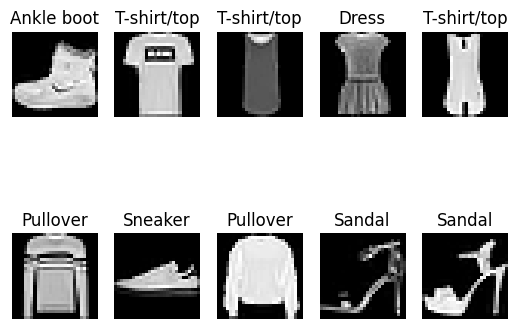

In [62]:
# Visualize the images
plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(2, 5)
for i in range(10):
  image, label = train_data[i]

  # Select the appropriate subplot
  row = i // 5
  col = i % 5

  ax[row, col].set_title(class_names[label])
  ax[row, col].imshow(image.squeeze(), cmap='gray')

  ax[row, col].axis(False)

#**Data loader**
While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting

In [63]:
# Set the size of mini batch
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True # it will take shuffle the samples while selecting for a batch
                              )
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True
                             )

In [64]:
print(f"Number of training batches: {len(train_dataloader)} of batch size {BATCH_SIZE}")
print(f"Number of testing batches: {len(test_dataloader)} of batch size {BATCH_SIZE}")

Number of training batches: 1875 of batch size 32
Number of testing batches: 313 of batch size 32


Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


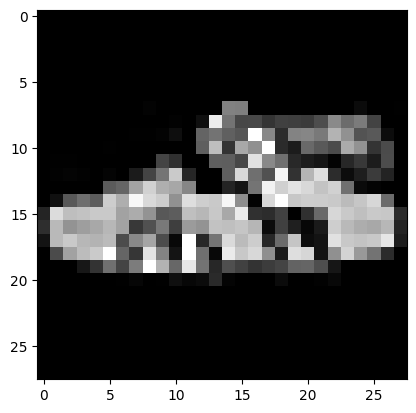

Label: 5
Class label: Sandal


In [65]:
# Display image and label inside a batch
torch.manual_seed(42)

train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(f"Class label: {class_names[label]}")

#**Build a baseline model**

In [66]:
# This is a baseline model with simple neural network, we will improve the model based on this model
class FashionMnistModelV0(nn.Module):
  def __init__(self, input_units: int, hidden_units: int, output_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # we perform flatten because our model can't work on multidimensional input, so because of this it converts multidimensional data to 1 dimension
        nn.Linear(in_features=input_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_units)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [67]:
# Instantiating the model
model_0 = FashionMnistModelV0(784, # size of input image with is (28, 28) -> input features will be 28*28
                              16, # number of hidden units
                              10 # As we have 10 different classes
                              ).to('cpu')
model_0

FashionMnistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [68]:
# Setting up the loss function and optimizer
loss_function = nn.CrossEntropyLoss() # as our problem is multiclass classification so we are using cross entropy loss

LEARNING_RATE = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=LEARNING_RATE)

# Calculate accuracy metrics
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [69]:
from timeit import default_timer as timer
# Function to calculate the model's execution time so that we can find how fast is our model performing
def calculate_time(start: float, end: float, device: str):
  print(f'Total time: {end - start} seconds on device {device}')

#**Create training loop and train the model**

In [70]:
# tqdm -> make loops show a smart progress meter
from tqdm.auto import tqdm

# Setup seed and start the timer
torch.manual_seed(42)
start = timer()

# Number of epochs to train our model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}")

  '''
  As we will be calculating the training loss and accuracy per batch so we will set it 0 initially and after training we can perform average to get the training loss and accuracy
  for that epoch
  '''
  training_loss = 0
  training_accuracy = 0

  # Now we will train our model batch wise
  # train_dataloader returns input and labels, and we are using enumerate to get the batch number ie. batch 0, batch 1, batch 2...
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    # Step 1: Set the model for training phase
    model_0.train()

    # Step 2: Perform the forward pass
    y_pred_train = model_0(X_train)

    # Step 3: Calculate the training loss and accuracy per batch
    train_loss = loss_function(y_pred_train, y_train)
    train_accuracy = accuracy_fn(y_train, y_pred_train.argmax(dim=1))

    # Step 4: Set up the gradient to zero
    optimizer.zero_grad()

    # Step 5: Perform the gradient descent
    train_loss.backward()

    # Step 6: Take step in the direction of low gradient
    optimizer.step()

    # Collecting all the training loss and accuracy per batches
    training_loss += train_loss
    training_accuracy += train_accuracy

    # Print out the progress
    if batch % 400 == 0:
      print(f'Current training completed for {batch * len(X_train)} / {len(train_dataloader.dataset)} samples')

  # Calculate the average training loss and accuracy for the current epoch
  training_loss /= len(train_dataloader)
  training_accuracy /= len(train_dataloader)

  # Set the model for testing phase
  model_0.eval()

  '''
  As we will be calculating the testing loss and accuracy per batch so we will set it 0 initially and after testing we can perform average to get the testing loss and accuracy
  for that epoch
  '''
  testing_loss = 0
  testing_accuracy = 0

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Perform the forward pass
      y_pred_test = model_0(X_test)

      # Calculate the loss per batch
      test_loss = loss_function(y_pred_test, y_test)

      # Calculate the accuracy per batch
      test_accuracy = accuracy_fn(y_test, y_pred_test.argmax(dim=1))

      # Collecting all the testing loss and accuracy per batch
      testing_loss += test_loss
      testing_accuracy += test_accuracy

    # Calculate the average testing loss and accuracy for the current epoch
    testing_loss /= len(test_dataloader)
    testing_accuracy /= len(test_dataloader)

  print(f"Training loss: {training_loss: .4f}, Training accuracy: {training_accuracy: .4f}%, Testing loss: {testing_loss: .4f}, Testing accuracy: {testing_accuracy: .4f}%,")

end = timer()
calculate_time(start, end, 'cpu')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
Current training completed for 0 / 60000 samples
Current training completed for 12800 / 60000 samples
Current training completed for 25600 / 60000 samples
Current training completed for 38400 / 60000 samples
Current training completed for 51200 / 60000 samples
Training loss:  0.5851, Training accuracy:  80.0033%, Testing loss:  0.4954, Testing accuracy:  82.6278%,
Epoch 1
Current training completed for 0 / 60000 samples
Current training completed for 12800 / 60000 samples
Current training completed for 25600 / 60000 samples
Current training completed for 38400 / 60000 samples
Current training completed for 51200 / 60000 samples
Training loss:  0.4512, Training accuracy:  84.1783%, Testing loss:  0.4948, Testing accuracy:  82.3283%,
Epoch 2
Current training completed for 0 / 60000 samples
Current training completed for 12800 / 60000 samples
Current training completed for 25600 / 60000 samples
Current training completed for 38400 / 60000 samples
Current training completed for 512

#**Test the model**

In [71]:
# Function to return the results of the model on the data passed
def model_eval(model: torch.nn.Module, data: torch.utils.data.DataLoader, loss_function=loss_function, accuracy_function=accuracy_fn):
  model.eval()

  loss, accuracy = 0, 0

  with torch.inference_mode():
    # Loop through the batches and predict the output on the model
    for X, y in tqdm(data):
      # Perform the forward pass
      y_pred = model(X)

      # Calculate the loss and accuracy per batch
      loss += loss_function(y_pred, y)
      accuracy += accuracy_function(y, y_pred.argmax(dim=1))

    # Calculate the average loss and accuracy
    loss /= len(test_dataloader)
    accuracy /= len(test_dataloader)

  # Returning all the result of the model prediction
  return {
      "model_name": model.__class__,
      "model_loss": loss.item(),
      "model_accuracy": accuracy
  }

In [72]:
model_eval(model_0, test_dataloader, loss_function, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': __main__.FashionMnistModelV0,
 'model_loss': 0.45844370126724243,
 'model_accuracy': 83.995607028754}

#**Run the model on GPU**

In [73]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#**Build model**
As our previous model performed good with accuracy with 84%, lets try to add some non linearity and run on the GPU

In [74]:
class FashionMnistModelV1(nn.Module):
  def __init__(self, input_units, hidden_units, output_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_units),
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [75]:
# Instantiating the model
model_1 = FashionMnistModelV1(784, # size of input image with is (28, 28) -> input features will be 28*28
                              16, # number of hidden units
                              10 # As we have 10 different classes
                              ).to(device)
model_1

FashionMnistModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [76]:
# Setting up the loss function and optimizer
loss_function = nn.CrossEntropyLoss() # as our problem is multiclass classification so we are using cross entropy loss

LEARNING_RATE = 0.01
optimizer = torch.optim.Adam(model_1.parameters(), lr=LEARNING_RATE)

#**Create training loop and train the model**

In [77]:
def trainLoop(model: torch.nn.Module, # model to train
               data: torch.utils.data.DataLoader, # Data to train on
               loss_function: torch.nn.Module, # Function to calculate the loss
               optimizer: torch.nn.Module, # nn Module to perform the optimization of neural network
               accuracy_function, # Function to calculate the accuracy
               device: str # Device on which we want to train the model "cpu" / "cuda"
               ):
  '''
  This function take the parameters and train the model on the data and prints the result of trained model
  '''

  '''
  As we will be calculating the training loss and accuracy per batch so we will set it 0 initially and after training we can perform average to get the training loss and accuracy
  for that epoch
  '''
  training_loss, training_accuracy = 0, 0

  # Setup model for training phase
  model.train()

  # Now we will train our model batch wise
  # Data loader returns input and labels, and we are using enumerate to get the batch number ie. batch 0, batch 1, batch 2..
  for batch, (X_train, y_train) in enumerate(data):

    # Setup the data to the appropriate device
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Perform the forward pass on the training data
    y_pred_train = model(X_train)

    # Calculate the training loss and accuracy per batch
    train_loss = loss_function(y_pred_train, y_train)
    training_loss += train_loss
    training_accuracy += accuracy_fn(y_train, y_pred_train.argmax(dim=1))

    # Set up the gradient to zero
    optimizer.zero_grad()

    # Perform the gradient descent
    train_loss.backward()

    # Take step towards the lowest gradient
    optimizer.step()

  # Calculate the average training loss and accuracy for the current epoch
  training_loss /= len(data)
  training_accuracy /= len(data)
  print(f"Training loss: {training_loss: .5f}, Training accuracy: {training_accuracy: .5f}")


def testLoop(model: torch.nn.Module, # model to train
              data: torch.utils.data.DataLoader, # Data to test on
               loss_function: torch.nn.Module, # Function to calculate the loss
               accuracy_function, # Function to calculate the accuracy
               device: str # Device on which we want to train the model "cpu" / "cuda"
            ):

  # Setup model for testing phase
  model.eval()

  with torch.inference_mode():
    '''
    As we will be calculating the testing loss and accuracy per batch so we will set it 0 initially and after testing we can perform average to get the testing loss and accuracy
    for that epoch
    '''
    testing_loss, testing_accuracy = 0, 0

    for X_test, y_test in data:
      # Set the data to the appropriate device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Perform the forward pass on the data
      y_pred_test = model(X_test)

      # Calculate the testing loss and accuracy and accumulate through out the batches
      testing_loss += loss_function(y_pred_test, y_test)
      testing_accuracy += accuracy_fn(y_test, y_pred_test.argmax(dim=1))

    # Calculate the average training loss and accuracy for test batch data
    testing_loss /= len(test_dataloader)
    testing_accuracy /= len(test_dataloader)
    print(f"Testing loss: {testing_loss: .5f}, Testing accuracy: {testing_accuracy: .5f}")

In [78]:
torch.manual_seed(42)

# Start the timer so that we can calulate the time taken to run the model on gpu
start = timer()

# Setup number of epochs to train the model
epochs = 3

# Iterate through the epochs.
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}:")

  # Start the train of model
  trainLoop(model_1, train_dataloader, loss_function, optimizer, accuracy_fn, device)

  # Test the model
  testLoop(model_1, test_dataloader, loss_function, accuracy_fn, device)

# Stop the timer
end = timer()

# Print out the total time taken to run and train the model
calculate_time(start, end, device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
Training loss:  0.56887, Training accuracy:  79.39833
Testing loss:  0.47316, Testing accuracy:  83.47644
Epoch 1:
Training loss:  0.46227, Training accuracy:  83.75667
Testing loss:  0.45737, Testing accuracy:  83.91573
Epoch 2:
Training loss:  0.44133, Training accuracy:  84.37500
Testing loss:  0.46362, Testing accuracy:  84.07548
Total time: 33.20845740599998 seconds on device cuda
